Classification 思路  
1. 引入資料集  
2. 找出資料特徵 & 關聯係數
3. 將資料分組 (實驗組 & 對照組)  
4. 做成決策樹 & 訓練模型
5. 繪出決策樹
6. 帶入對照組資料，預測
7. 正確率 (accuracy_score)
8. 剖析正確率 (混淆矩陣)

In [20]:
from sklearn.datasets import load_wine
import pandas as pd


wine = load_wine()
df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
df["target"] = wine["target"]
# 資料 & 答案 df

x = pd.DataFrame(wine["data"], columns=wine["feature_names"])
# 資料 df
y = wine["target"]
# 答案 df

<Axes: >

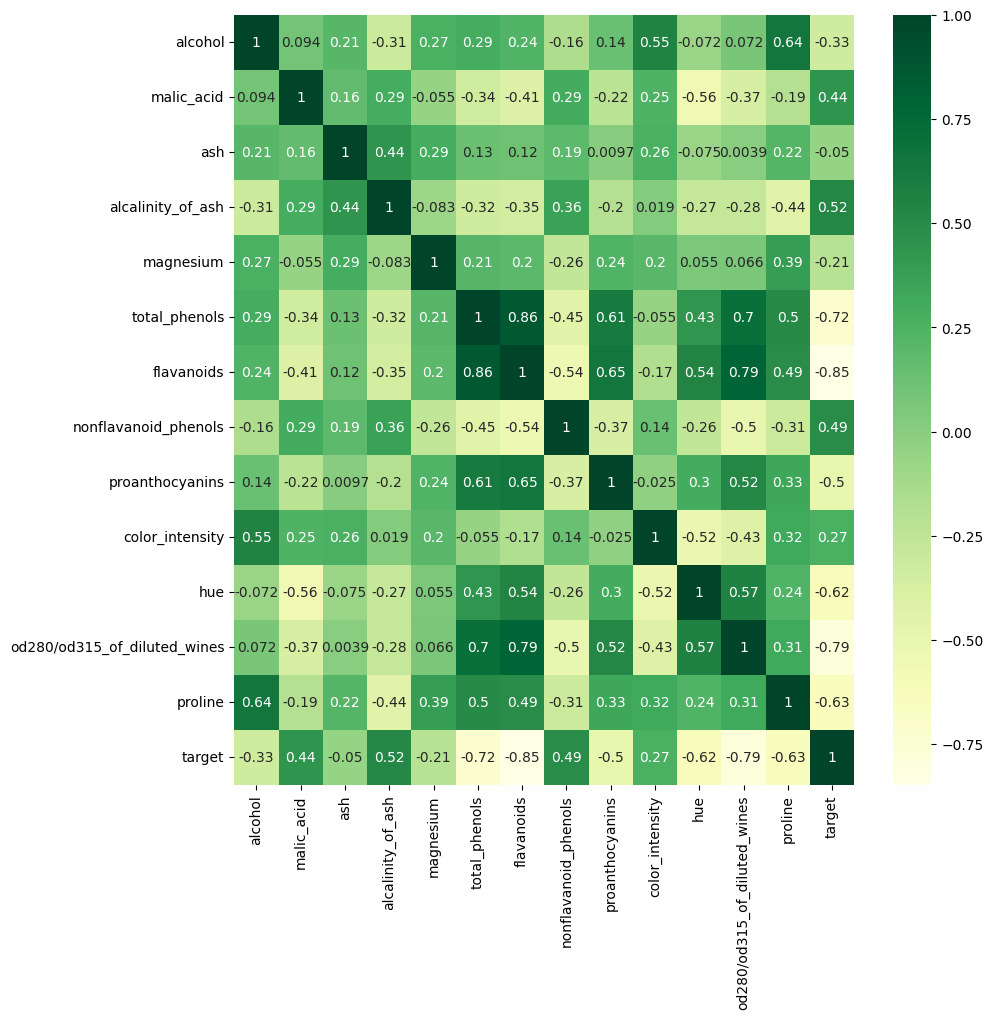

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df.astype("float").corr()
# df 功能 / astype 轉換浮點數 / corr 相關係數

plt.figure(figsize=(10,10))
sns.heatmap(df.astype("float").corr(), annot=True, cmap="YlGn")

In [22]:
from sklearn.model_selection import train_test_split
import numpy as np


xarray = np.array(x)
yarray = np.array(y)
# 轉array

x_train, x_test, y_train, y_test = train_test_split(xarray, yarray, test_size=0.1)
# 資料分組

In [23]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(max_depth=3)
# 做成決策樹

clf.fit(x_train, y_train)
# 訓練模型

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'proline <= 760.0\ngini = 0.656\nsamples = 160\nvalue = [53, 65, 42]\nclass = class_1'),
 Text(0.25, 0.625, 'od280/od315_of_diluted_wines <= 1.925\ngini = 0.48\nsamples = 102\nvalue = [1, 63, 38]\nclass = class_1'),
 Text(0.125, 0.375, 'ash <= 2.06\ngini = 0.105\nsamples = 36\nvalue = [0, 2, 34]\nclass = class_2'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = class_1'),
 Text(0.1875, 0.125, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]\nclass = class_2'),
 Text(0.375, 0.375, 'flavanoids <= 0.895\ngini = 0.142\nsamples = 66\nvalue = [1, 61, 4]\nclass = class_1'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4]\nclass = class_2'),
 Text(0.4375, 0.125, 'gini = 0.032\nsamples = 62\nvalue = [1, 61, 0]\nclass = class_1'),
 Text(0.75, 0.625, 'flavanoids <= 2.165\ngini = 0.19\nsamples = 58\nvalue = [52, 2, 4]\nclass = class_0'),
 Text(0.625, 0.375, 'malic_acid <= 1.825\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = class_2'

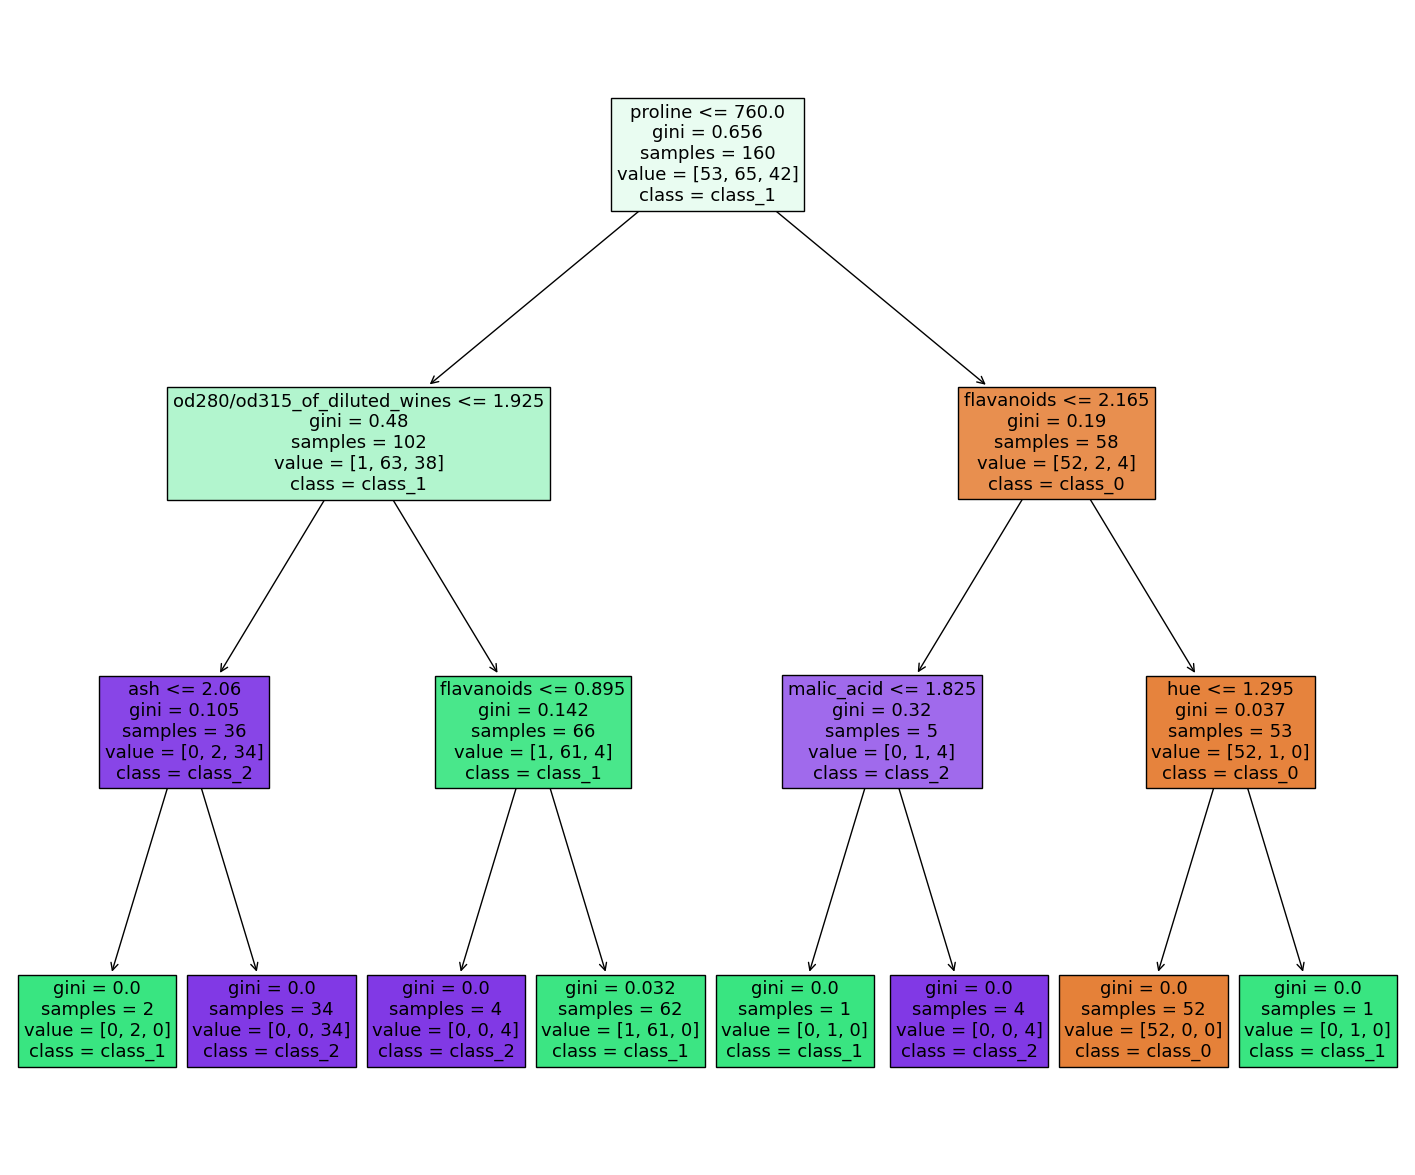

In [24]:
from sklearn.tree import plot_tree


plt.figure(figsize=(18,15))
plot_tree(clf, feature_names=wine["feature_names"], class_names=wine["target_names"], filled=True, fontsize=13)

In [25]:
pre = clf.predict(x_test)

print(list(pre))
print(list(y_test))


[1, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 0, 1, 2, 1, 2, 2, 1]
[0, 1, 2, 2, 0, 0, 0, 2, 0, 1, 2, 1, 1, 2, 1, 1, 2, 0]


In [26]:
from sklearn.metrics import accuracy_score


accuracy_score(y_test, pre)

0.7222222222222222

In [27]:
from sklearn.metrics import confusion_matrix


con = confusion_matrix(y_test, pre)
pd.DataFrame(con)

,0,1,2
0,4,2,0
1,1,4,1
2,0,1,5


Cluster 思路  
1. 引入資料集 & 整理資料
2. 將資料分組 (實驗組 & 對照組)  
3. 尋找K值 -> 畫分群圖 (K means)
4. 可畫圖找K值
5. 計算K值的正確率 (silhouette_score)

In [28]:
from sklearn.datasets import load_wine
import pandas as pd


wine = load_wine()
# 引入資料

df = pd.DataFrame(wine["data"], columns=wine["feature_names"])
df["target"] = wine["target"]
# 資料 & 答案 df

x = pd.DataFrame(wine["data"], columns=wine["feature_names"])
y = wine["target"]

In [29]:
from sklearn.model_selection import train_test_split
import numpy as np


xarray = np.array(x)
yarray = np.array(y)
# 轉換array

x_train, x_test, y_train, y_test = train_test_split(xarray, yarray, test_size=0.1)
# 分資料

In [37]:
from sklearn.cluster import KMeans


clu = KMeans(n_clusters=3)
# 自己假設分三群

clu.fit(x_train)
# 帶入訓練資料

clu.labels_
# 貼標籤

from sklearn.metrics import silhouette_score
# 計算正確率

silhouette_score(x_train, clu.labels_)
# 計算正確率


c:\Users\李重誼\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 0, 2, 1, 2, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 0, 2, 1,
       1, 0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 0, 0, 2, 1, 2, 1, 0, 1, 0,
       0, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2,
       0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 2, 0, 1, 1, 1, 0, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 2, 1, 0,
       1, 1, 1, 0, 0, 1])

In [31]:
# 正常情況下 不知道K值

list_for_k = []
list_for_score = []

for k in range(2,6):
    clu = KMeans(n_clusters=k, n_init="auto")
    clu.fit(xarray)

    s = silhouette_score(xarray, clu.labels_)

    list_for_k.append(k)
    list_for_score.append(s)

print("k值:", list_for_k)
print("正確率:", list_for_score)

k值: [2, 3, 4, 5]
正確率: [0.6568536504294317, 0.5711381937868838, 0.5573078942193448, 0.5194946959520188]


In [1]:
# 透過上方得知k為2時，分數最高
clu = KMeans(n_clusters=2)
clu.fit(x_train)
clu.labels_

pre = clu.predict(x_test)

print("預測:", pre)
print("正確:", y_test)

NameError: name 'KMeans' is not defined

Cluster  
1. 資料中並沒有答案
2. 所以計算出最適合的KMeans時，我們可以自己對labels分出來的資料命名 clusterA, clusterB ...
3. 所以沒有正確答案與否的問題
4. silhouette_score 也並非正確率分數 而是各個資料相聚程度的分數